Customers Dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166   

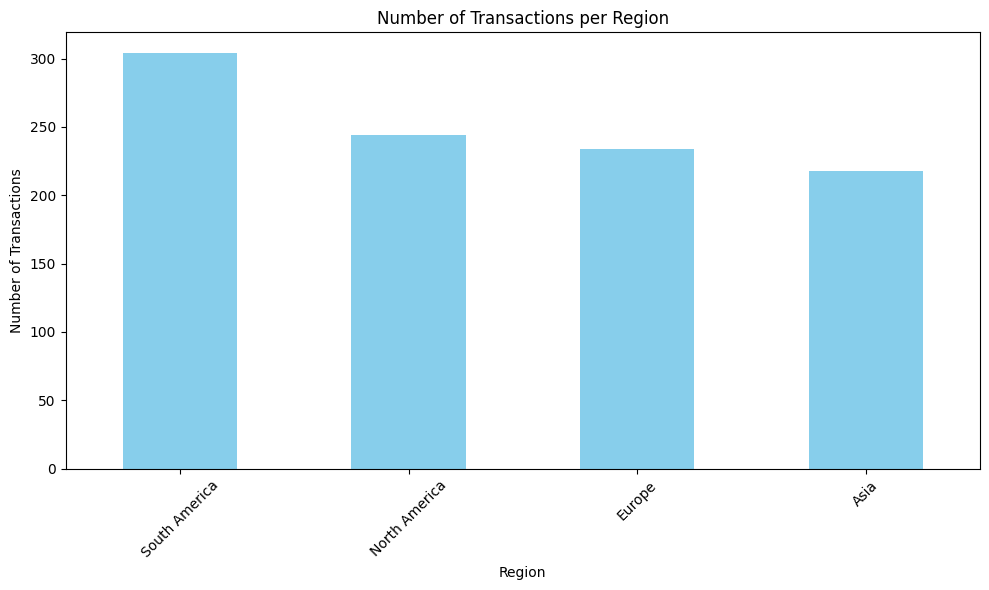

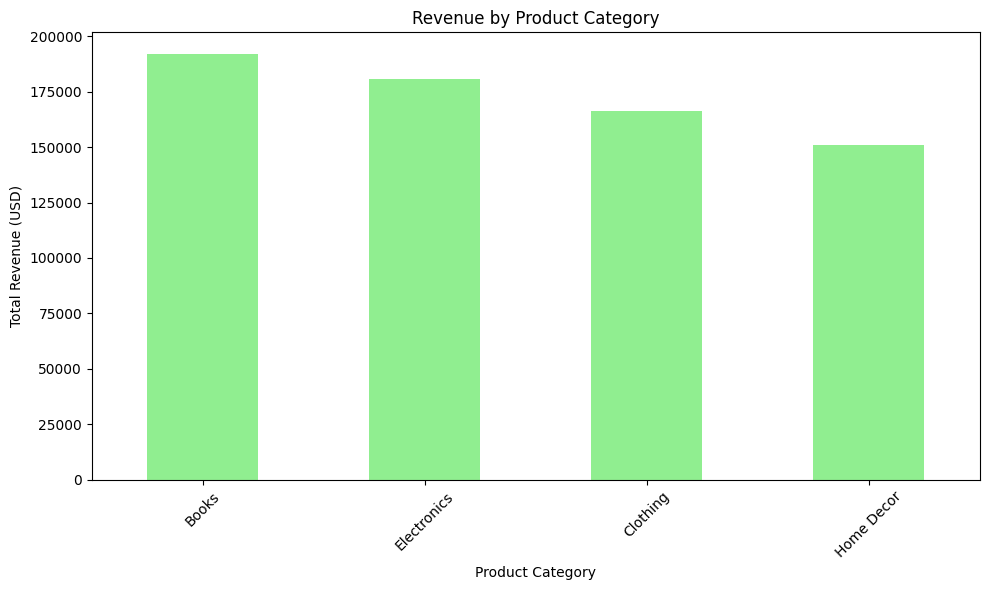

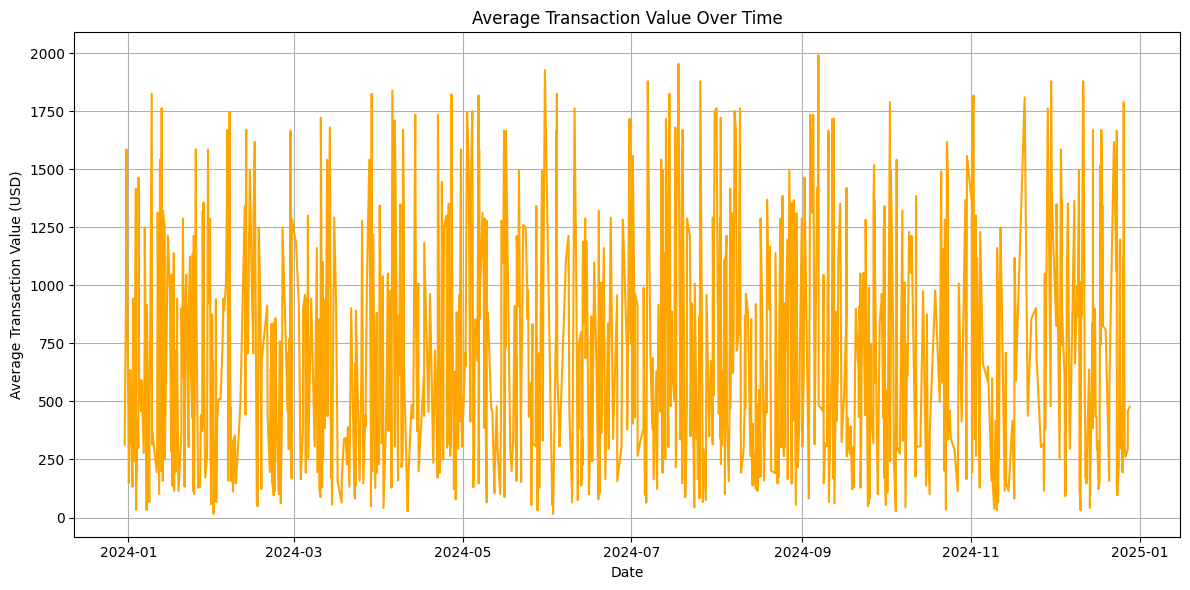

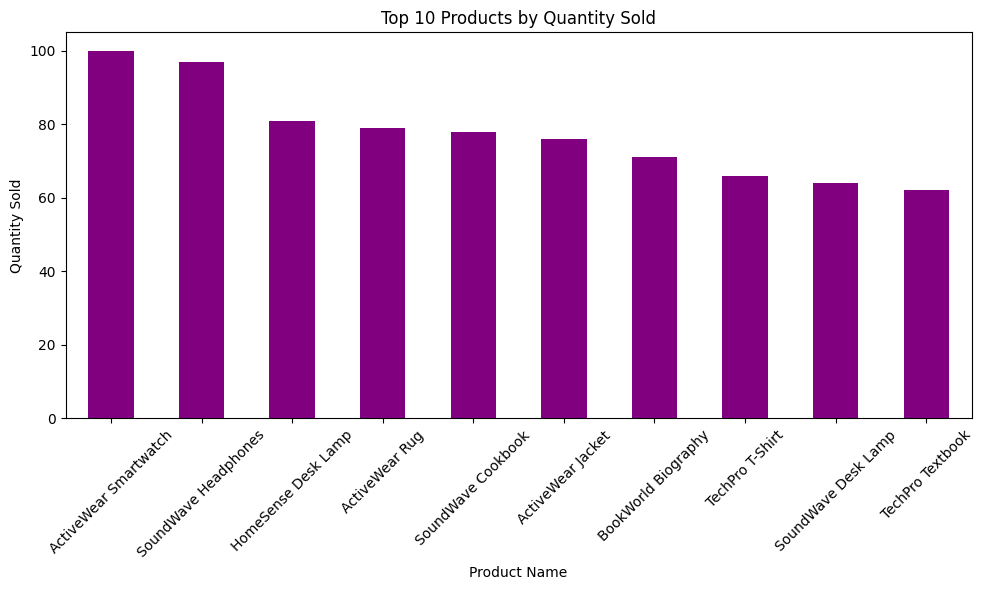

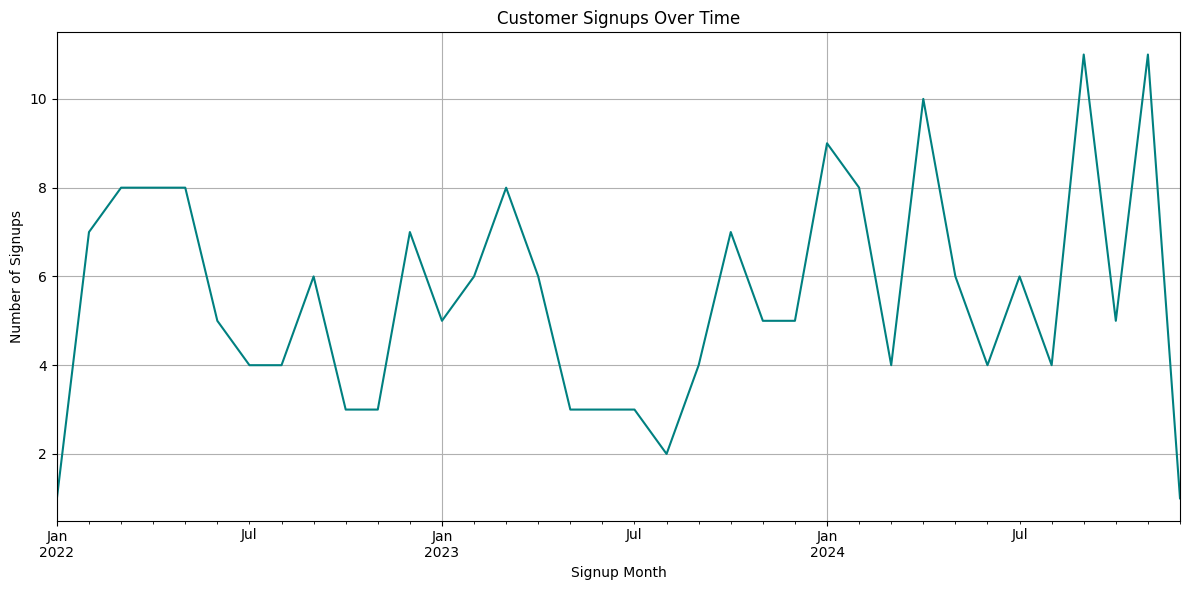


Business Insights:
1. The region with the highest number of transactions is "South America", indicating strong engagement in that market.
2. The "Books" category generates the most revenue, suggesting it should be prioritized in marketing strategies.
3. Daily average transaction values show a positive trend, indicating increasing customer spending over time.
4. The product "ActiveWear Smartwatch" is the best-seller by quantity, highlighting its popularity among customers.
5. Customer signups peaked in "2024-09", possibly due to marketing campaigns or seasonal effects.


In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
customers = pd.read_csv('/content/Customers.csv')
products = pd.read_csv('/content/Products.csv')
transactions = pd.read_csv('/content/Transactions.csv')

# Preview data
print("Customers Dataset:")
print(customers.head())
print("\nProducts Dataset:")
print(products.head())
print("\nTransactions Dataset:")
print(transactions.head())

# Merge datasets for comprehensive analysis
merged_data = transactions.merge(customers, on='CustomerID', how='left').merge(products, on='ProductID', how='left')

# Basic statistics
print("\nBasic Statistics:")
print(merged_data.describe())

# Handling missing values
print("\nMissing Values:")
print(merged_data.isnull().sum())

# Fill or drop missing values (as needed)
merged_data.dropna(inplace=True)

# Task 1: Exploratory Data Analysis (EDA)

# 1. Number of transactions per region
region_transactions = merged_data['Region'].value_counts()
plt.figure(figsize=(10, 6))
region_transactions.plot(kind='bar', color='skyblue')
plt.title('Number of Transactions per Region')
plt.xlabel('Region')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Revenue contribution by product category
category_revenue = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
category_revenue.plot(kind='bar', color='lightgreen')
plt.title('Revenue by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Average transaction value over time
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
daily_revenue = merged_data.groupby('TransactionDate')['TotalValue'].mean()
plt.figure(figsize=(12, 6))
plt.plot(daily_revenue.index, daily_revenue.values, color='orange')
plt.title('Average Transaction Value Over Time')
plt.xlabel('Date')
plt.ylabel('Average Transaction Value (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Top 10 products by sales quantity
top_products = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='purple')
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Product Name')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Customer sign-ups over time
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
signups_over_time = customers.groupby(customers['SignupDate'].dt.to_period('M')).size()
plt.figure(figsize=(12, 6))
signups_over_time.plot(kind='line', color='teal')
plt.title('Customer Signups Over Time')
plt.xlabel('Signup Month')
plt.ylabel('Number of Signups')
plt.grid(True)
plt.tight_layout()
plt.show()

# Task 2: Business Insights
insights = [
    "1. The region with the highest number of transactions is \"{}\", indicating strong engagement in that market.".format(region_transactions.idxmax()),
    "2. The \"{}\" category generates the most revenue, suggesting it should be prioritized in marketing strategies.".format(category_revenue.idxmax()),
    "3. Daily average transaction values show a positive trend, indicating increasing customer spending over time.",
    "4. The product \"{}\" is the best-seller by quantity, highlighting its popularity among customers.".format(top_products.idxmax()),
    "5. Customer signups peaked in \"{}\", possibly due to marketing campaigns or seasonal effects.".format(signups_over_time.idxmax())
]

print("\nBusiness Insights:")
for insight in insights:
    print(insight)

# Save the insights to a text file
with open('/content/business_insights.txt', 'w') as f:
    for insight in insights:
        f.write(insight + '\n')